In [59]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.base import BaseEstimator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.base import BaseEstimator
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier





In [61]:
data =pd.read_csv('/content/drive/MyDrive/colab labs/CustomerChurn_dataset.csv')

In [62]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [63]:
# Display basic statistics of the dataset
print(data.describe())


       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [64]:
# Display the columns
print("Columns in the dataset:")
print(data.columns)

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(data.head())

Columns in the dataset:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

First few rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No 

In [65]:
# Checking  for missing values
print(data.isnull().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


EDA Analysis

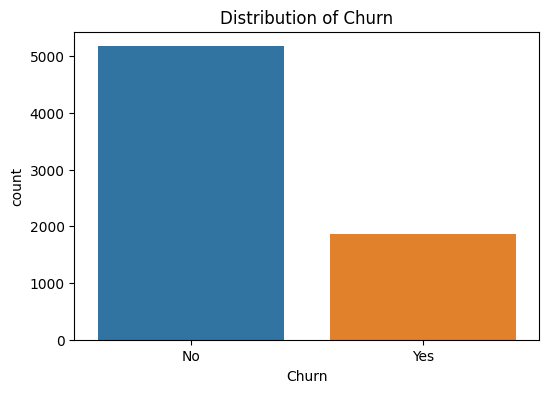

In [66]:
# Visualize the distribution of the target variable 'Churn'
plt.figure(figsize=(6, 4)) # the width size is 6 and the lenght 4
sns.countplot(x='Churn', data=data)
plt.title('Distribution of Churn')
plt.show()


<ipython-input-67-8982c4c5585d>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Churn', y=column, data=data_filtered, ci=None)


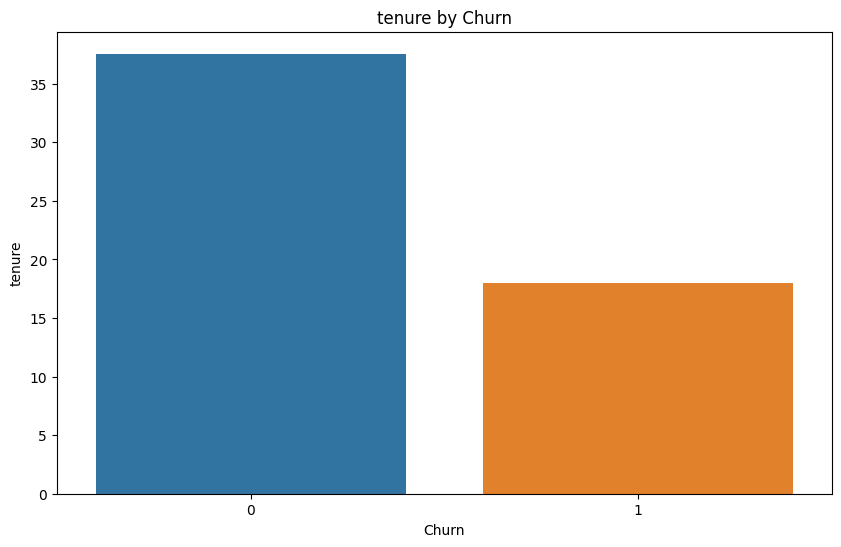

<ipython-input-67-8982c4c5585d>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Churn', y=column, data=data_filtered, ci=None)


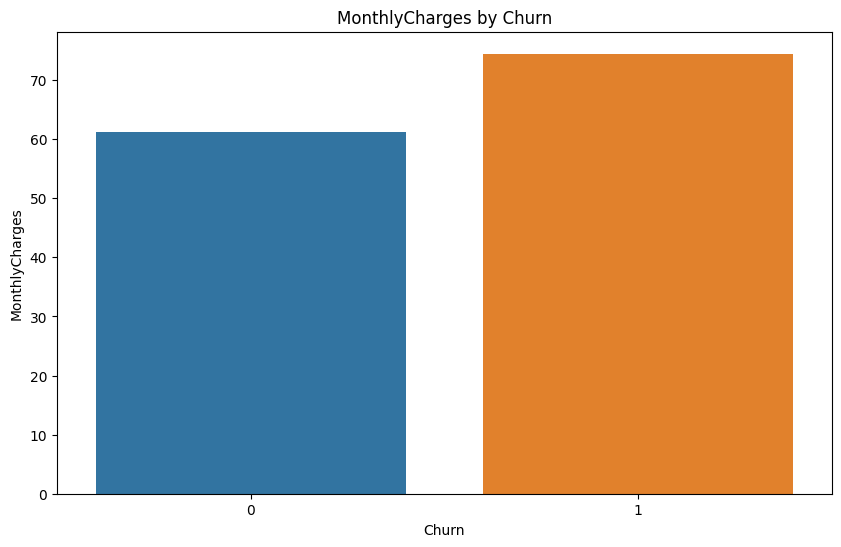

<ipython-input-67-8982c4c5585d>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Churn', y=column, data=data_filtered, ci=None)


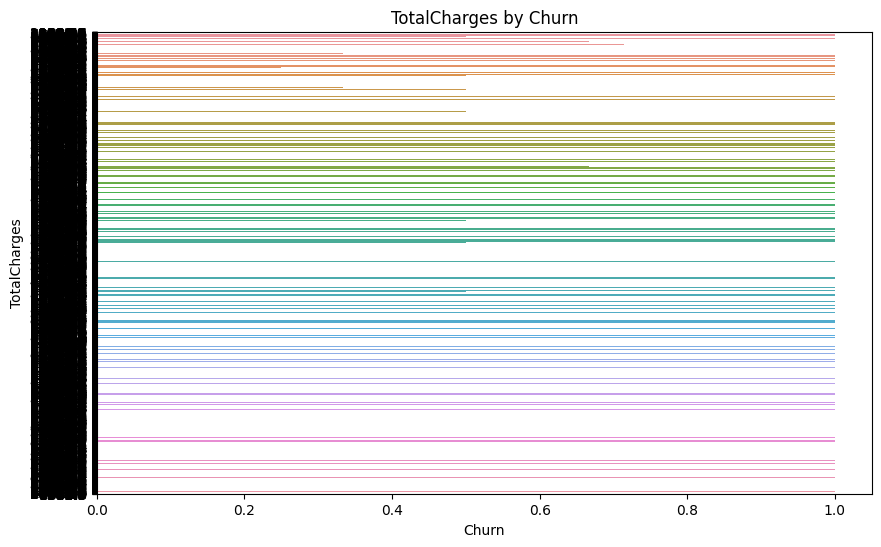

In [67]:

# Convert 'Churn' to numerical values using label encoding
data['Churn'] = data['Churn'].map({'No': 0, 'Yes': 1})

# Exploring  the relationship between numerical variables and Churn using bar charts
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

for column in numerical_columns:
    plt.figure(figsize=(10, 6))

    # Drop rows with missing values in the numerical column
    data_filtered = data.dropna(subset=[column])

    sns.barplot(x='Churn', y=column, data=data_filtered, ci=None)
    plt.title(f'{column} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(column)
    plt.show()


Plotting the Churn distribution to know how many customers churned 'Yes' and how many did not 'No'.

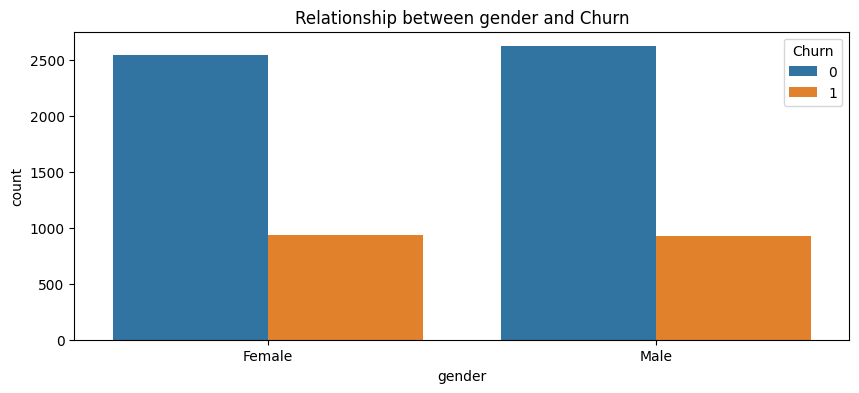

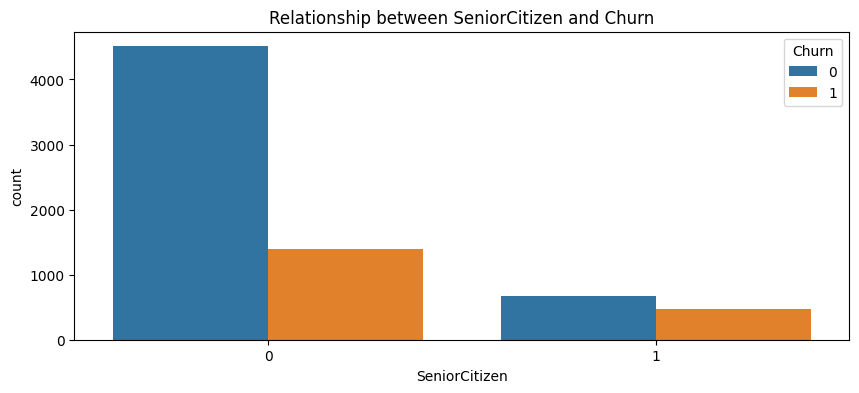

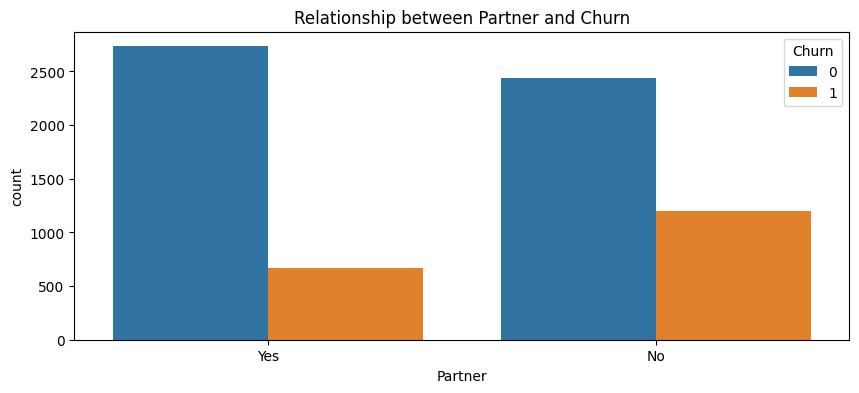

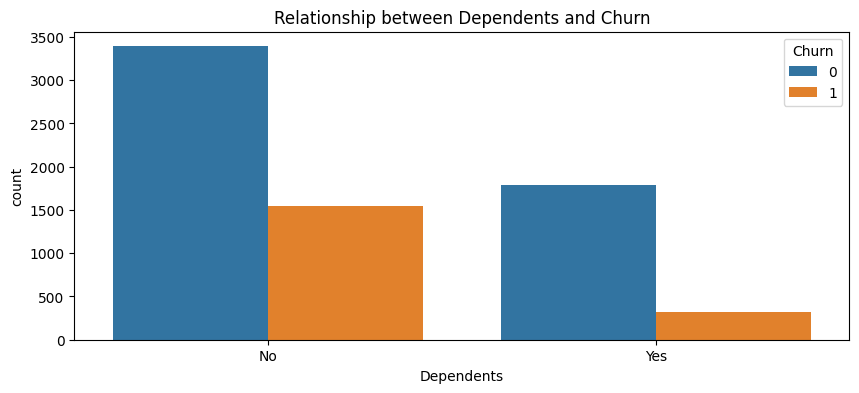

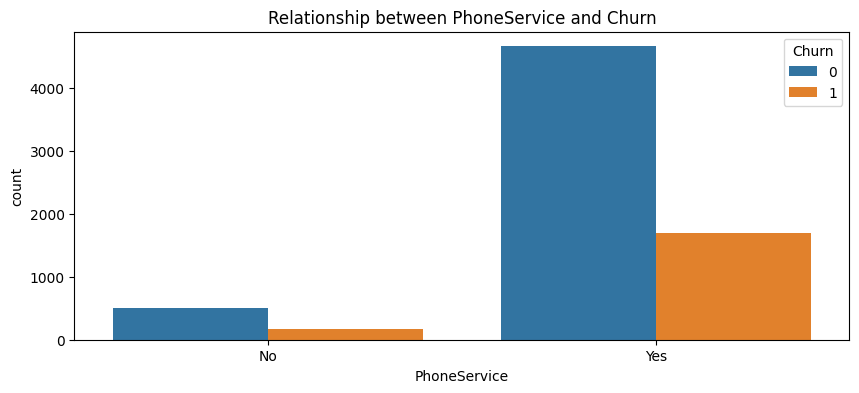

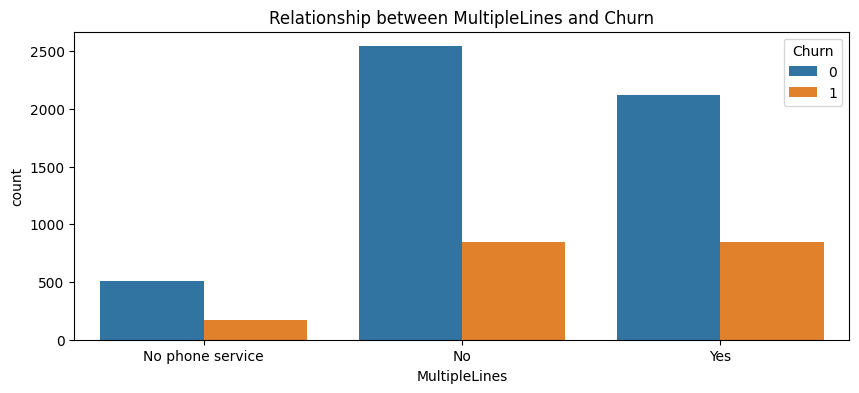

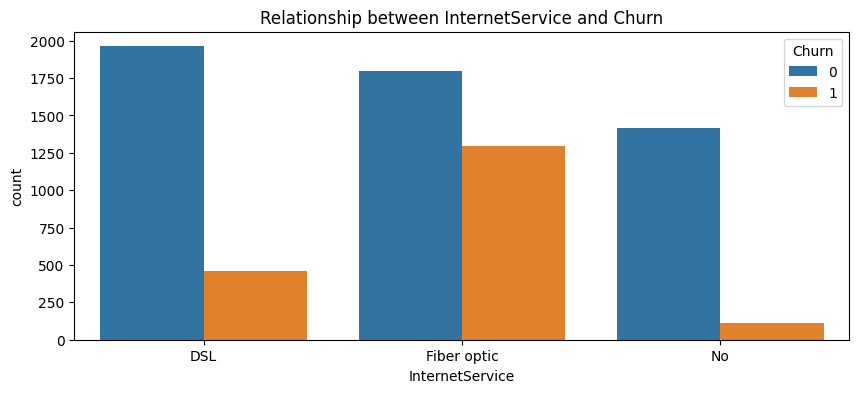

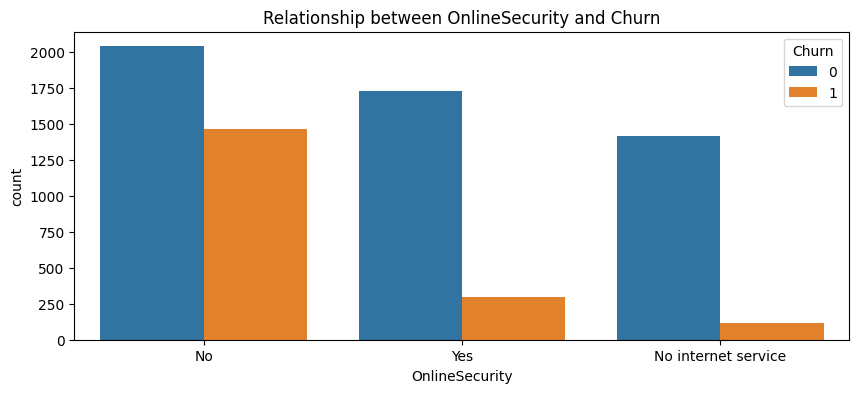

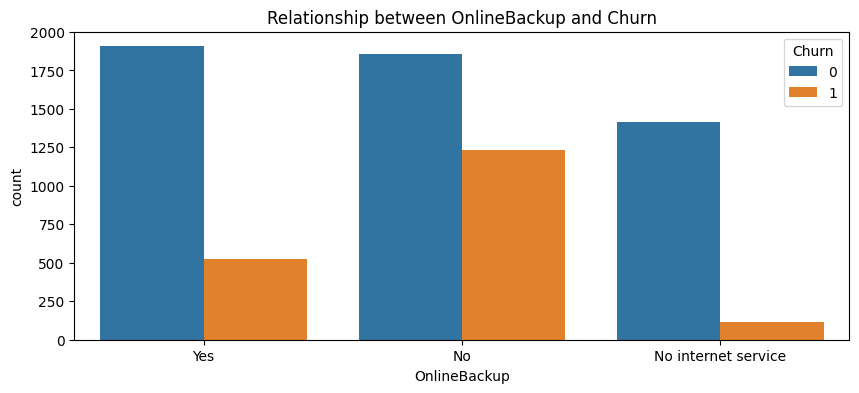

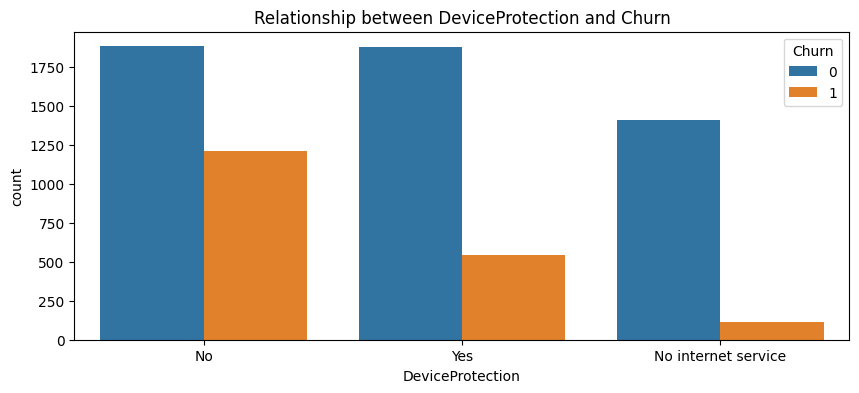

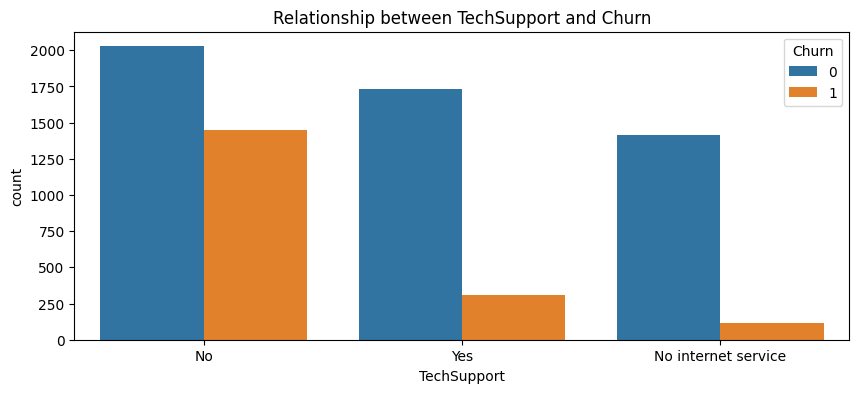

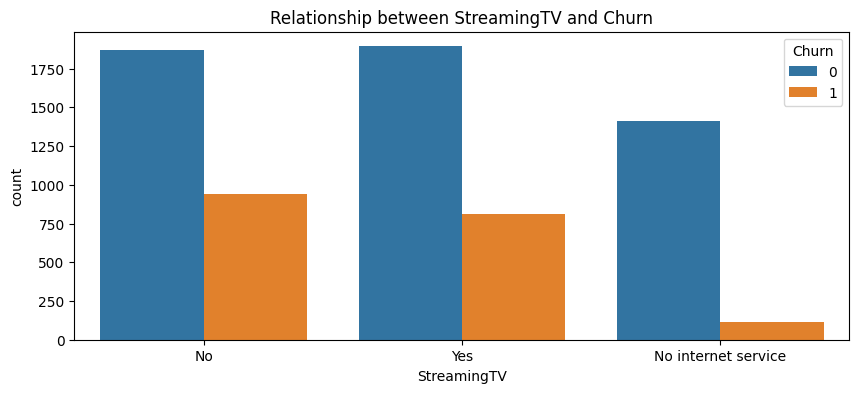

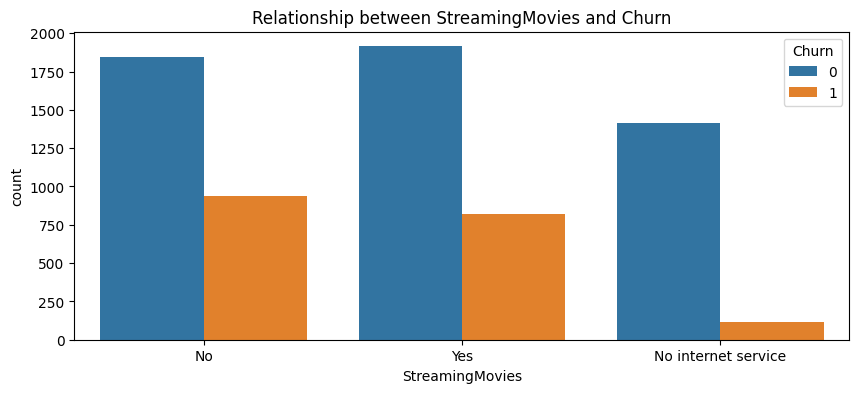

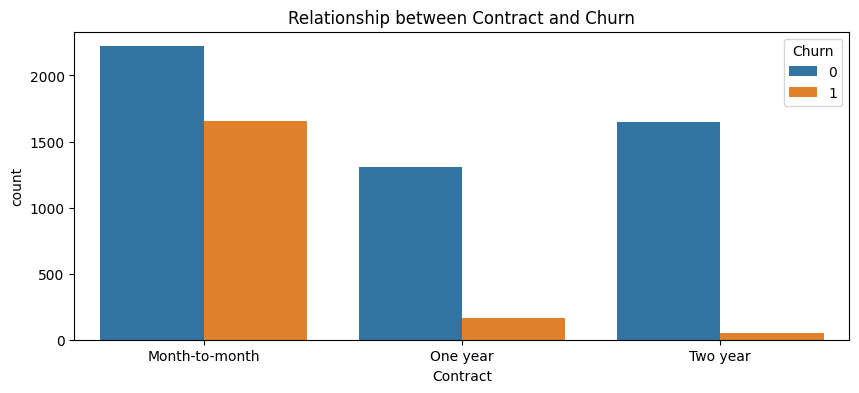

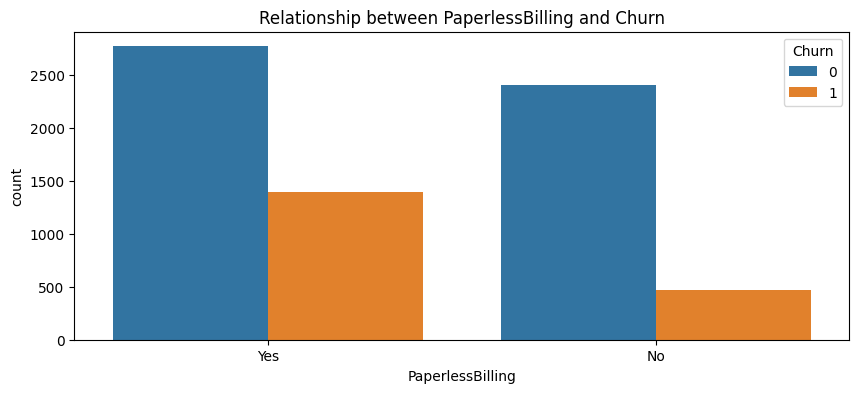

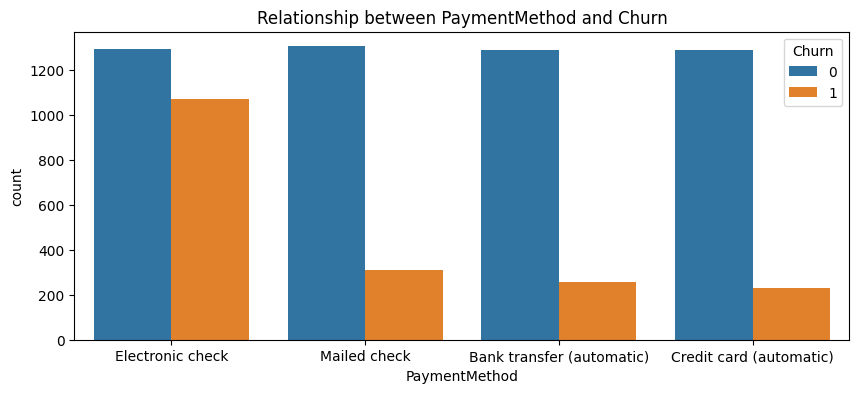

In [68]:
# Explore the relationship between categorical variables and Churn
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']

for column in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=column, hue='Churn', data=data)
    plt.title(f'Relationship between {column} and Churn')
    plt.show()


<ipython-input-69-c2b3e573a7f7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


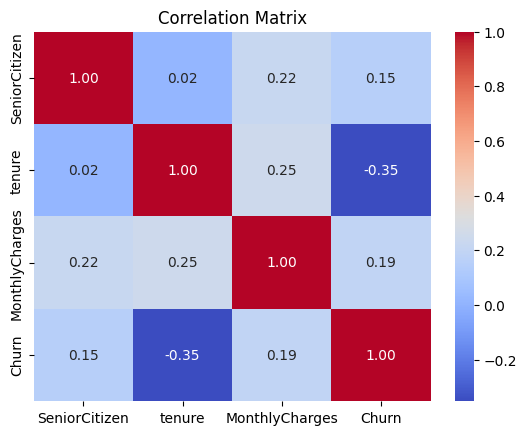

In [69]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


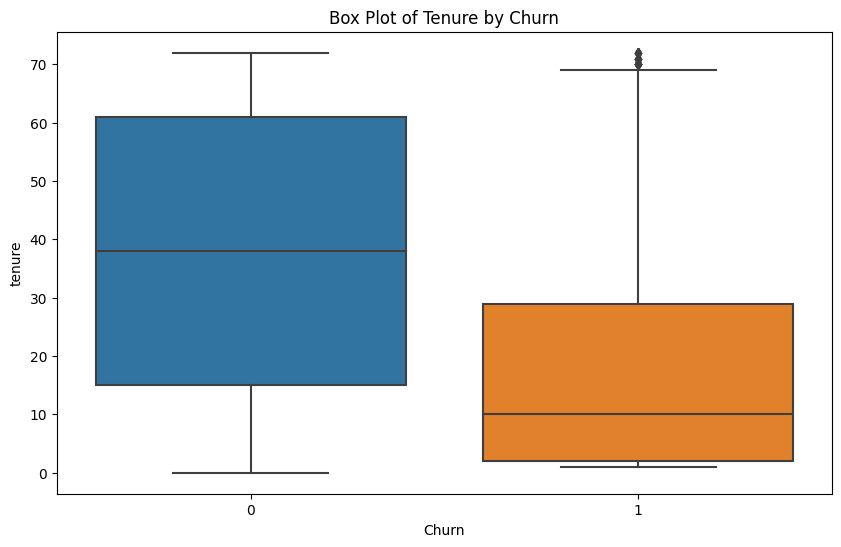

In [70]:
# Example: Box plot for tenure and Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title('Box Plot of Tenure by Churn')
plt.show()


In [71]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## Data Preprocessing

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [73]:
data['TotalCharges'] = data['TotalCharges'].apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()

In [74]:
data['TotalCharges'].isnull().sum()

11

In [75]:
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

In [76]:
data['TotalCharges'].isnull().sum()

0

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [78]:
selected_df = data.drop(['customerID'], axis = 1)

In [79]:
cat_cols = selected_df.select_dtypes(include=['object']).columns

In [80]:
cat_cols = cat_cols.tolist()
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [81]:
le = LabelEncoder()
for col in cat_cols:
    selected_df[col] = le.fit_transform(selected_df[col])

In [82]:
selected_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Feature selction using Random Forest Classifier.

In [83]:
X = selected_df.drop('Churn', axis=1)
y = selected_df['Churn']

In [84]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

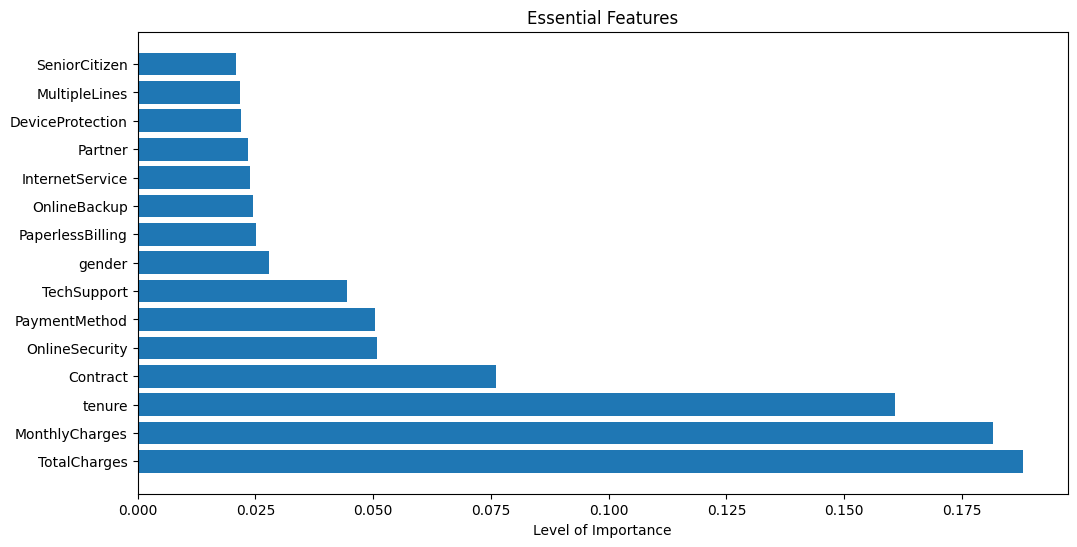



Relevant features:
['TotalCharges' 'MonthlyCharges' 'tenure' 'Contract' 'OnlineSecurity'
 'PaymentMethod' 'TechSupport' 'gender' 'PaperlessBilling' 'OnlineBackup'
 'InternetService' 'Partner' 'DeviceProtection' 'MultipleLines'
 'SeniorCitizen']


In [85]:
rfc = RandomForestClassifier()

# Fit the classifier
rfc.fit(X, y)

# Get feature importances
feature_importances = rfc.feature_importances_

# Create a DataFrame to store feature names and their importances
df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
df = df.sort_values(by='Importance', ascending=False)

# Plot feature importances
top_features = 15  # Change this value to plot a different number of top features
plt.figure(figsize=(12, 6))
plt.barh(df['Feature'][:top_features], df['Importance'][:top_features])
plt.xlabel('Level of Importance')
plt.title('Essential Features')
plt.show()
final_features=df['Feature'][:top_features].values

# Display the list of important features
print("\n\nRelevant features:")
print(final_features)

### Training

In [86]:
X = selected_df[final_features]
y = selected_df['Churn']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [89]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense


input_layer = Input(shape=(X_train.shape[1],))
dense_layer_1 = Dense(64, activation='relu')(input_layer)
dense_layer_2 = Dense(32, activation='relu')(dense_layer_1)
output_layer = Dense(1, activation='sigmoid')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output_layer, name='model')

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=0
)

## Display the model summary
model.summary()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

## Evaluate the model
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

## Calculate accuracy and AUC score
accuracy = accuracy_score(y_test, y_pred_binary)
auc_score = roc_auc_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy}")
print(f"\nAUC Score: {auc_score}")

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 15)]              0         
                                                                 
 dense_45 (Dense)            (None, 64)                1024      
                                                                 
 dense_46 (Dense)            (None, 32)                2080      
                                                                 
 dense_47 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3137 (12.25 KB)
Trainable params: 3137 (12.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
45/45 [==============================] - 0s 2ms/step - loss: 0.4046 - accuracy: 0.8098
Test Loss: 0.40463197231292725, Test Accuracy: 0.8097941875457764
45/45 

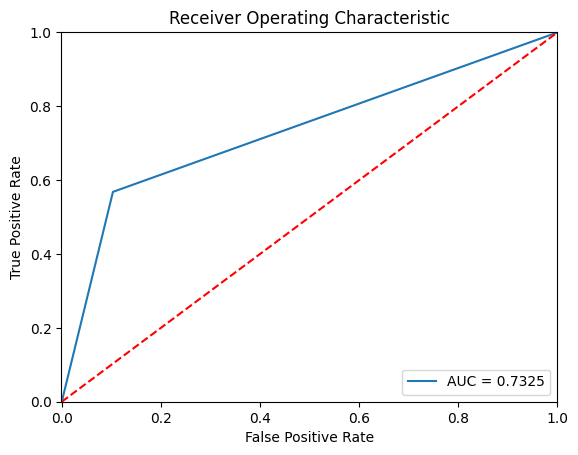

In [90]:
from sklearn.metrics import auc,roc_curve
# Calculate the AUC

predictions = [np.round(value) for value in y_pred]

fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [91]:
accuracy = accuracy_score(y_test, predictions)
cofidence_factor = 2.58 * np.sqrt( (accuracy * (1 - accuracy)) / y_test.shape[0])
cofidence_factor

0.026975123117145797

In [92]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Function to create the Keras model
def create_model(units=64):
    input_layer = Input(shape=(X_train.shape[1],))
    dense_layer_1 = Dense(units, activation='relu')(input_layer)
    dense_layer_2 = Dense(32, activation='relu')(dense_layer_1)
    output_layer = Dense(1, activation='sigmoid')(dense_layer_2)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Create a KerasClassifier
keras_model = KerasClassifier(build_fn=create_model, epochs=5, batch_size=32, verbose=True)

# Define a smaller hyperparameter space for grid search
param_grid = {
    'batch_size': [32],
    'optimizer': ['adam'],
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=keras_model, param_grid=param_grid, scoring=['accuracy', 'roc_auc'], refit='roc_auc', cv=3, verbose=True)
grid_result = grid_search.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=True)


# Get the best parameters
best_params = grid_result.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid_result.best_estimator_
best_model_main = grid_result.best_estimator_.model

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_auc = roc_auc_score(y_test, y_pred)
test_accuracy = accuracy_score(y_test, (y_pred > 0.5).astype(int))

print(f'Test AUC: {test_auc}, Test Accuracy: {test_accuracy}')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


118/118 [==============================] - 1s 4ms/step - loss: 0.4679 - accuracy: 0.7732 - val_loss: 0.4099 - val_accuracy: 0.8055
Epoch 2/5
118/118 [==============================] - 0s 3ms/step - loss: 0.4310 - accuracy: 0.7937 - val_loss: 0.4096 - val_accuracy: 0.8126
Epoch 3/5
118/118 [==============================] - 0s 3ms/step - loss: 0.4270 - accuracy: 0.7929 - val_loss: 0.4106 - val_accuracy: 0.8048
Epoch 4/5
118/118 [==============================] - 0s 3ms/step - loss: 0.4224 - accuracy: 0.8017 - val_loss: 0.4068 - val_accuracy: 0.8148
Epoch 5/5
59/59 [==============================] - 0s 2ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


118/118 [==============================] - 2s 7ms/step - loss: 0.4708 - accuracy: 0.7790 - val_loss: 0.4160 - val_accuracy: 0.7970
Epoch 2/5
118/118 [==============================] - 1s 5ms/step - loss: 0.4234 - accuracy: 0.7987 - val_loss: 0.4087 - val_accuracy: 0.8062
Epoch 3/5
118/118 [==============================] - 1s 5ms/step - loss: 0.4127 - accuracy: 0.8035 - val_loss: 0.4101 - val_accuracy: 0.8098
Epoch 4/5
118/118 [==============================] - 1s 5ms/step - loss: 0.4074 - accuracy: 0.8128 - val_loss: 0.4080 - val_accuracy: 0.8055
Epoch 5/5
59/59 [==============================] - 0s 2ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


118/118 [==============================] - 1s 5ms/step - loss: 0.5019 - accuracy: 0.7508 - val_loss: 0.4282 - val_accuracy: 0.8027
Epoch 2/5
118/118 [==============================] - 0s 3ms/step - loss: 0.4333 - accuracy: 0.7905 - val_loss: 0.4139 - val_accuracy: 0.8091
Epoch 3/5
118/118 [==============================] - 0s 3ms/step - loss: 0.4242 - accuracy: 0.7918 - val_loss: 0.4093 - val_accuracy: 0.8119
Epoch 4/5
118/118 [==============================] - 0s 3ms/step - loss: 0.4196 - accuracy: 0.7963 - val_loss: 0.4100 - val_accuracy: 0.8105
Epoch 5/5
59/59 [==============================] - 0s 1ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


177/177 [==============================] - 1s 3ms/step - loss: 0.4703 - accuracy: 0.7654 - val_loss: 0.4177 - val_accuracy: 0.8148
Epoch 2/5
177/177 [==============================] - 0s 2ms/step - loss: 0.4313 - accuracy: 0.7941 - val_loss: 0.4101 - val_accuracy: 0.8112
Epoch 3/5
177/177 [==============================] - 0s 3ms/step - loss: 0.4227 - accuracy: 0.7991 - val_loss: 0.4151 - val_accuracy: 0.8070
Epoch 4/5
177/177 [==============================] - 1s 3ms/step - loss: 0.4188 - accuracy: 0.8005 - val_loss: 0.4098 - val_accuracy: 0.8133
Epoch 5/5
177/177 [==============================] - 0s 2ms/step - loss: 0.4144 - accuracy: 0.7996 - val_loss: 0.4074 - val_accuracy: 0.8084
Best Parameters: {'batch_size': 32, 'optimizer': 'adam'}
45/45 [==============================] - 0s 2ms/step
Test AUC: 0.7195661287484343, Test Accuracy: 0.808374733853797


In [93]:
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model

## Save the model
model = model.save('churning_data.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
